<a href="https://colab.research.google.com/github/MerlinePricillaPeter/Large-Language-model/blob/main/Large_Language_Model_22010726.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow transformers datasets


In [ ]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("tweet_eval", "sentiment")


<ipython-input-21-ec8688514850>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=train_df, palette='viridis')


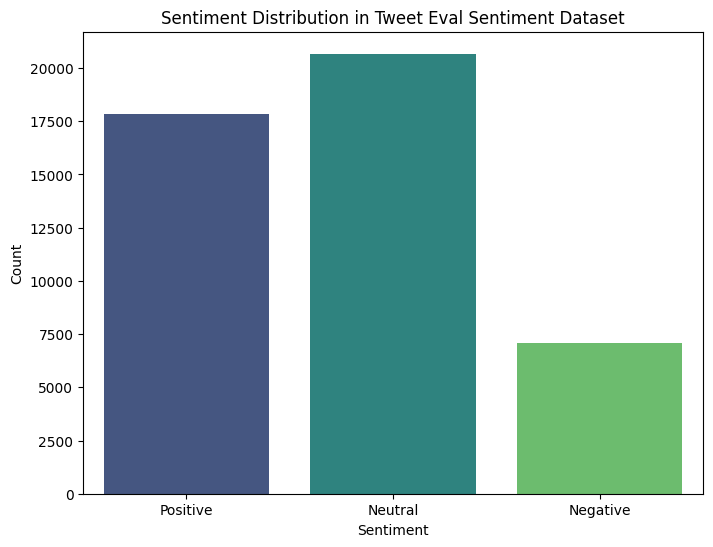

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("tweet_eval", "sentiment")

# Extract the training set for visualization
train_data = dataset['train']

# Convert to a Pandas DataFrame for easier visualization
train_df = train_data.to_pandas()

# Mapping sentiment labels to more descriptive names
sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
train_df['sentiment_label'] = train_df['label'].map(sentiment_mapping)

# Plotting the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=train_df, palette='viridis')
plt.title('Sentiment Distribution in Tweet Eval Sentiment Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
from transformers import BertTokenizer

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

#  preprocessing  the dataset
encoded_dataset = dataset.map(preprocess_function, batched=True)


In [ ]:
import tensorflow as tf

def dataset_to_tf_dataset(dataset, batch_size=8):
    # Create a TensorFlow dataset from the Hugging Face dataset
    return dataset.to_tf_dataset(
        columns=['input_ids', 'attention_mask'],
        label_cols=['label'],
        batch_size=batch_size,
        shuffle=True,
        collate_fn=lambda x: {k: tf.convert_to_tensor([d[k] for d in x]) for k in x[0]}
    )

train_dataset = dataset_to_tf_dataset(encoded_dataset['train'])
test_dataset = dataset_to_tf_dataset(encoded_dataset['test'])


/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:410: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
# Defining a TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(tokenizer.model_max_length,), dtype=tf.int32),
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=128),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes for sentiment
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#  Train the model
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


Epoch 1/10
5702/5702 ━━━━━━━━━━━━━━━━━━━━ 498s 87ms/step - accuracy: 0.4500 - loss: 1.0166 - val_accuracy: 0.4833 - val_loss: 1.1430
Epoch 2/10
5702/5702 ━━━━━━━━━━━━━━━━━━━━ 461s 80ms/step - accuracy: 0.4550 - loss: 1.0148 - val_accuracy: 0.4833 - val_loss: 1.1558
Epoch 3/10
5702/5702 ━━━━━━━━━━━━━━━━━━━━ 502s 80ms/step - accuracy: 0.4561 - loss: 1.0120 - val_accuracy: 0.4833 - val_loss: 1.1758
Epoch 4/10
5702/5702 ━━━━━━━━━━━━━━━━━━━━ 502s 80ms/step - accuracy: 0.4574 - loss: 1.0117 - val_accuracy: 0.4833 - val_loss: 1.1794
Epoch 5/10
5702/5702 ━━━━━━━━━━━━━━━━━━━━ 502s 80ms/step - accuracy: 0.4537 - loss: 1.0141 - val_accuracy: 0.4833 - val_loss: 1.1448
Epoch 6/10
5702/5702 ━━━━━━━━━━━━━━━━━━━━ 456s 80ms/step - accuracy: 0.4473 - loss: 1.0173 - val_accuracy: 0.4833 - val_loss: 1.1636
Epoch 7/10
5702/5702 ━━━━━━━━━━━━━━━━━━━━ 473s 75ms/step - accuracy: 0.4537 - loss: 1.0130 - val_accuracy: 0.4833 - val_loss: 1.1825
Epoch 8/10
5702/5702 ━━━━━━━━━━━━━━━━━━━━ 521s 89ms/step - accuracy: 

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)

# Print out the loss and accuracy
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


1536/1536 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4799 - loss: 1.1690
Test loss: 1.1707
Test accuracy: 0.4833


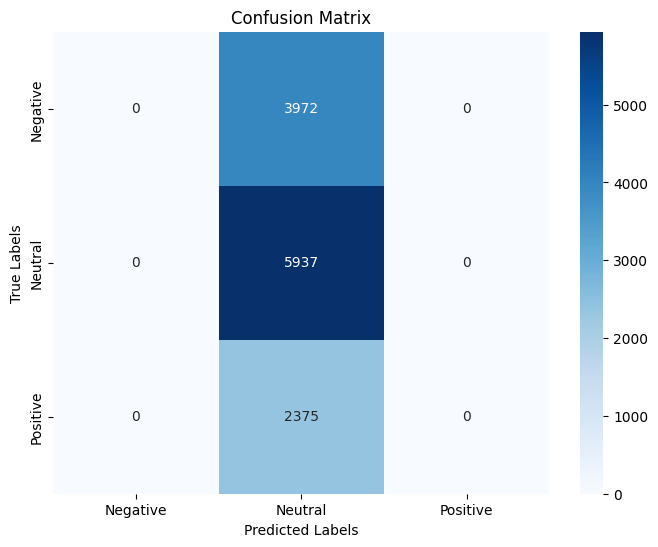

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_mapping.values(), yticklabels=sentiment_mapping.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Make predictions on the test dataset
test_predictions = model.predict(test_dataset)

# The predictions are probabilities; get the class with the highest probability
test_predicted_classes = tf.argmax(test_predictions, axis=1)

# Print the predicted classes for the test dataset
print(f"Predicted classes for the test dataset: {test_predicted_classes.numpy()}")

1536/1536 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step
Predicted classes for the test dataset: [1 1 1 ... 1 1 1]


1536/1536 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step


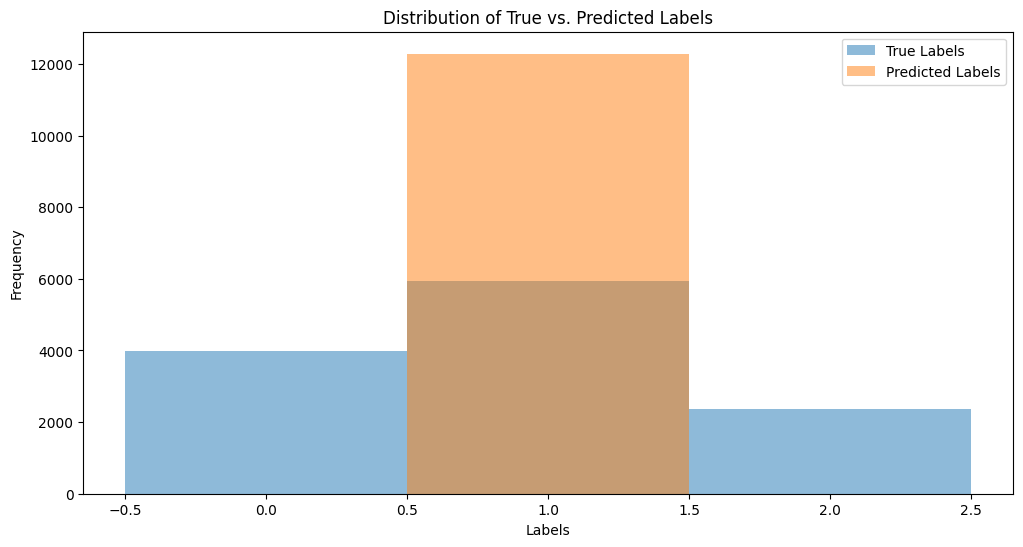

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test dataset
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=-1)  # Convert probabilities to class labels

# Extract true labels
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(true_labels, bins=np.arange(4) - 0.5, alpha=0.5, label='True Labels')
plt.hist(predicted_labels, bins=np.arange(4) - 0.5, alpha=0.5, label='Predicted Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of True vs. Predicted Labels')
plt.show()
